FEUILLE DE TP 8

---
# Intégration numérique (Partie 1)
---

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np                       # pour les numpy array
import matplotlib.pyplot as plt          #Librairie graphique
import scipy as scp

Dans ce TP, nous allons programmer et étudier des différentes formules de quadrature élémentaires. Nous les testerons sur les fonctions suivantes :
\begin{align}
f_0(x) &= \exp(-x), &
f_1(x) &= \frac{\exp(-x^2)}{2},&
f_2(x) &= \sqrt{\sin x},\\
%f_2(x) &= 0.1 \,(1+x/3)^3 \log(1+x),&
%f_3(x) &= \sin(2\pix) / (1.1 - \sin(\pix)).
\end{align}

**Question 1.**

> Définissez ces 3 fonctions et tracez les sur l'intervalle $[0, 3]$.

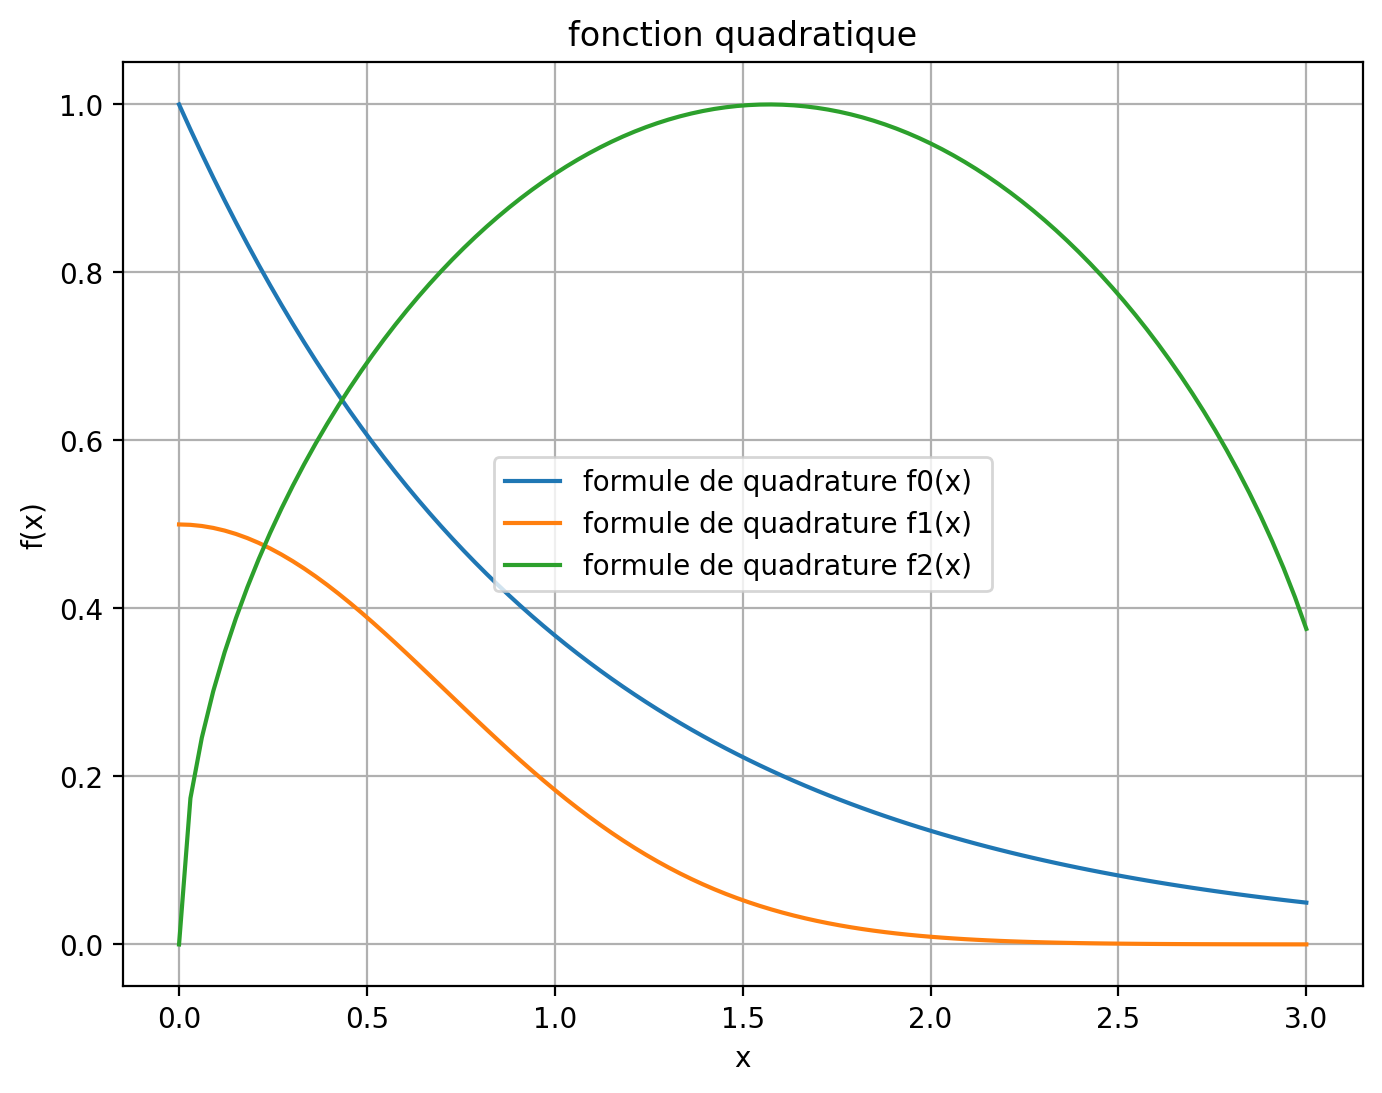

In [4]:
f0 = lambda x : np.exp(-x)
f1 = lambda x : np.exp(-x**2)/2
f2 = lambda x : np.sqrt(np.sin(x))

f = [f0,f1,f2]

x = np.linspace(0,3,100)

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
for i,fi in enumerate(f):
    ax.plot(x,fi(x), label = f'formule de quadrature f{i}(x) ',)
ax.set_xlabel(f'x')
ax.set_ylabel(f'f(x)')
ax.set_title(f'fonction quadratique')
ax.legend()

## Intégration en utilisant le module `scipy`

La fonction `quad` de `scipy.integrate` permet de calculer la valeur approchée d'une intégrale à une précision donnée. Lisez attentivement la documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html. 

**Question 2.**

> Calculer les intégrales de $f_i$, $ i = 0, 1, 2 $, sur $[0, 0.1]$ en utilisant la fonction `quad` de `scipy.integrate`. On choissira une erreur absolue epsabs = 1e-14. Pour $ i = 0 $ comparer la valeur obtenue avec la valeur de l'intégrale calculée à la main.

In [5]:
for i,fi in enumerate(f):
    int_f = scp.integrate.quad(fi, 0, 0.1, epsabs = 1e-14)
    print(int_f)

    
print(1-np.exp(-0.1))

(0.09516258196404043, 1.0565168957925633e-15)
(0.04983383214516818, 5.532666785287096e-16)
(0.0210743222343681, 6.938893903907228e-17)
0.09516258196404048


## Formule du rectangle

La formule du rectangle consiste à faire l'approximation

\begin{equation}
\int_{a}^{b} f \approx J^R( f ) = (b-a) f(a).
\end{equation}

**Question 3.**

> 1. Programmez une fonction `quad_rect(f,a,b)` qui prend en argument une fonction `f` et deux réels `a` et `b`, et qui retourne la valeur approchée de  $ \int_a^b f(x)dx $ obtenue par la formule du rectangle.
> 2. Calculez les valeurs approchées des intégrales de $ f_i $, $ i = 0, 1, 2 $, sur $ [ 0, 0.1 ] $, comparez les valeurs obtenues avec celles de la question précédente.

In [6]:
def quad_rect(f,a,b):
    return (b-a)*f(a)

In [7]:
for i,fi in enumerate(f):
    rect = quad_rect(fi,0,0.1)
    print(rect)

0.1
0.05
0.0


## Etude du comportement d'erreur

On supposera que $ a = 0 $ et $ b = h $. On utilisera la notation $ J^R_h( f ) = J^R( f ) $ dans ce cas.

**Question 4.**

> 1. Calculez les valeurs approchée de $I_h(f_0) = \int_{0}^{h}f_0(x)dx $ à l'aide de la formule du rectangle pour $h=\lbrace 1, 1/2, 1/4, \ldots, 2^{-10}\rbrace$. 
> 2. Affichez alors en respectant le format ci-dessous au maximum les valeurs de $h$, $E_h(f_0)$, $E_h(f_0)/h$ et $E_h(f_0)/h^2$, où $E_h(f_0)=\vert I_h( f_0 )-J^R_h( f_0 )\vert$ :

```
-----------------------------------------------
  h         Eh(f0)/h^0  Eh(f0)/h^1  Eh(f0)/h^2
-----------------------------------------------
 1.000e+00  3.6788e-01  3.6788e-01  3.6788e-01
 5.000e-01  1.0653e-01  2.1306e-01  4.2612e-01
 2.500e-01  2.8801e-02  1.1520e-01  4.6081e-01
...
-----------------------------------------------
```

*Rappel : voici un exemple pour écrire le nombre 0.14159 sous la forme `1.4159e-01`*
```python
print(f"{0.14159:11.4e}")
```

> 3. Comparez la convergence de $ E_h( f_0 ) $ vers $ 0 $  à celle d'une puissance de $ h $ vers 0. Les résultats obtenus sont-ils conformes aux résultats vus en cours?

In [8]:
def Ih(f,a,b):
    return scp.integrate.quad(f, a, b, epsabs = 1e-14)[0]


h = 1/2**np.arange(0,11)

print ('     h','      Eh(f0)/h^0',' Eh(f0)/h^1''  Eh(f0)/h^2')
for i,hi in enumerate(h):
    R = quad_rect(f[0],0,hi)
    I = Ih(f[0],0,hi)
    E = abs(I - R)
    print (
        f"{hi:11.4e}",
           f"{E:11.4e}",
           f"{E/hi:11.4e}",
           f"{E/hi**2:11.4e}"
          )

     h       Eh(f0)/h^0  Eh(f0)/h^1  Eh(f0)/h^2
 1.0000e+00  3.6788e-01  3.6788e-01  3.6788e-01
 5.0000e-01  1.0653e-01  2.1306e-01  4.2612e-01
 2.5000e-01  2.8801e-02  1.1520e-01  4.6081e-01
 1.2500e-01  7.4969e-03  5.9975e-02  4.7980e-01
 6.2500e-02  1.9131e-03  3.0609e-02  4.8974e-01
 3.1250e-02  4.8323e-04  1.5464e-02  4.9483e-01
 1.5625e-02  1.2144e-04  7.7720e-03  4.9741e-01
 7.8125e-03  3.0438e-05  3.8961e-03  4.9870e-01
 3.9062e-03  7.6195e-06  1.9506e-03  4.9935e-01
 1.9531e-03  1.9061e-06  9.7593e-04  4.9967e-01
 9.7656e-04  4.7668e-07  4.8812e-04  4.9984e-01


## Formules de Newton-Cotes

Supposons que les points $ x_1, x_2, \ldots, x_N $ sont définies par l'une des formules suivantes:
$$
x_j=a+(j-1)\frac{b-a}{N-1}, \quad j = 1, \ldots, N, \quad (1)
$$
ou
$$
x_j=a+j\frac{b-a}{N+1}, \quad j = 1, \ldots, N. \quad (2)
$$

On rappelle que la formule de Newton-Cotes à $N$ points consiste à approcher $\int_a^b f(x)\,dx$ par   
$$
J^{NC}( f ) = \sum\limits_{k=1}^{N} \lambda_k f(x_k)
\quad \text{ avec } \quad 
 \lambda_k= \int_a^b L_i( x ) dx\,,
$$
où $ L_i $ est le $i$-ème polynome de Lagrange associé aux points $ x_1, x_2, \ldots, x_N $.

Si les points $ x_1, \ldots, x_N $ sont donnés par la relation (1), on parle de la formule de Newton-Cotes fermée; s'ils sont donnés par la relation (2), il s'agit de la formule de Newton-Cotes ouverte.

**Question 5.**

> 1. Proposez une fonction `points_NC_fermee(a, b, N)` qui prend en arguments 2 réels, les valeurs des bornes de l'intervalle `a`  et `b`  et 1 entier `N` et qui retourne un `ndarray` contenant les points d'interpolation pour la formule de Newton-Cotes fermée.
> 2. Proposez une fonction `points_NC_ouverte(a, b, N)` qui prend en arguments 2 réels, les valeurs des bornes de l'intervalle `a`  et `b`  et 1 entier `N` et qui retourne un `ndarray` contenant les points d'interpolation pour la formule de Newton-Cotes ouverte.
> 3. Proposez une fonction `quad_NC(f, N, a, b, lam, ouv)` qui prend en arguments une fonction `f`, un entier `N`, deux réels `a`, `b`, un `ndarray` `lam` et un booléen `ouv` et qui retourne la valeur approchée de  $ \int_a^b f(x)dx $ obtenue par la formule de Newton-Cotes à $N$ points avec les coéficients `lam`, ouverte si `ouv` vaut `True` et fermée si `ouv` est `False`.

In [9]:
def points_Nc_fermee(a,b,N):
    x = []
    for j in rang(1,N+1):
        x.append(a+(j-1)*((b-a)/(N-1))) 
    return x

def points_Nc_ouvert(a,b,N):
    x = []
    for j in rang(1,N+1):
        x.append(a+j*((b-a)/(N+1))) 
    return x

def quad_NC(f, N, a, b, lam, ouv):
    if ouv == True :
        x = points_Nc_ouvert(a, b, N)
        for k in range(0,N):
            J += lam[k]*f(x[k])
    else:
        x = points_Nc_fermee(a, b, N)
        for k in range(0,N):
            J += lam[k]*f(x[k])
    return J

## Cas particuliers: formules du point milieu, trapèze et Simpson

**Question 6.**

> 1. Rappelez les valeurs des coefficients $ \lambda_k $ pour les formules du point milieu, trapèze et Simpson (toutes les trois sont des cas particuliers de la formule de Newton-Cotes).
> 2. A l'aide de la fonction `quad_NC` programmez les fonctions `quad_milieu`, `quad_trapeze`, `quad_simpson` qui prend en argument une fonction `f` et deux réels `a` et `b` et qui retournent la valeur approchée de  $ \int_a^b f(x)dx $ obtenue par la formule du point milieu, du trapèze, de Simpson respectivement.
> 3. Testez vos fonctions en calculant une valeur approchée de l'intégrale de $ f_i $, $ i = 0, 1, 2 $; comparez avec la valeur de l'intégrale obtenue à l'aide de la fonction `quad`.

In [12]:
def quad_milieu(f, a, b):
    return quad_NC(f, a, b, lam = [(b-a)], ouv = True )

def quad_trapeze(f, a, b):
    return quad_NC(f, a, b, lam = [(b-a)/2, (b-a)/2], ouv = True )

def quad_simpson(f, a, b):
    return quad_NC(f, a, b, lam = [(b-a)/6, 2/3 * (b-a), (b-a)/6] , ouv = True )

In [13]:
a = 0
b = 0.1
for i,fi in enumerate(f):
    print (quad_milieu(fi,a,b))
    print (quad_trapeze(fi,a,b))
    print (quad_simpson(fi,a,b))

TypeError: quad_NC() missing 1 required positional argument: 'b'

> 3. Reprenez la question 4 pour chacune de ces trois méthodes pour étudier le comportement de l'erreur d'intégration en fonction de la longuer de l'intervalle d'intégration $ h $ (on étudiera $ E_h(f_0)/h^r $ pour quelques valeurs $ r \in \mathbb{N} $).  

## Méthodes d'ordre plus élevé


On souhaite obtenir les formules de Newton-Cotes à $ N $ points avec $ N = 4 $ et $ N = 5 $.

**Question 7.**

> 1. Proposez une fonction `Li(i, x)` qui prend en arguments un entier `i` et un `ndarray` `x` et qui retourne la fonction $ f: x \mapsto L_i( x ) $, où $ L_i $ est le $i$-ème polynome de Lagrange associé aux points `x` (vous pouvez utiliser des fonctions programmées en TP05).    
> 2. Proposez une fonction `NC_poids` qui prend en arguments un entier `N`, 2 réels `a` et `b` et un `ndarray` `x` et qui retourne un `ndarray` contenant les poids $ \lambda_k $ de la formule de Newton-Cotes à $ N $ points `x` pour intégration sur $[a,b]$.
On utilisera la fonction `Li` et la fonction `quad` du module `scipy.integrate` calculer les coéficients $ \lambda_k $ dans la formule de Newton-Cotes  
> 3. Testez votre code en calculant les poids $ \lambda_k $ dans la formule de Newton-Cotes fermée à $ N = 2 $ et $ N = 3 $. Obtenez-vous les poids de la formule du trapèze et de Simpson?
> 4. Calculer les poids $ \lambda_k $ dans la formule de Newton-Cotes fermée à $ N = 4 $ et $ N = 5 $ points.
> 5. Pouvez-vous deviner pourquoi la formule de Newton-Cotes à $ N = 4 $ points fermée est appelée "méthode de 3/8"?